In [16]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
face_cascade = cv2.CascadeClassifier("C:\\Users\\91701\\ActorClassifier\\model\\opencv\\haarcascades\\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:\\Users\\91701\\ActorClassifier\\model\\opencv\\haarcascades\\haarcascade_eye.xml")

In [18]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                            return roi_color

        
         
        
   
   
   

In [19]:
img1 = get_cropped_image_if_2_eyes("C:\\Users\\91701\\ActorClassifier\\model\\dataset\\Cilian Murphy\\Cillian Murphy - Cillian Murphy Photo....png")

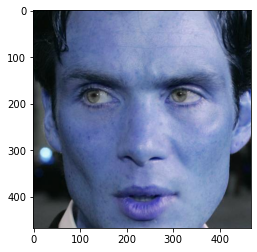

In [20]:
plt.imshow(img1)

## FOLDERS FOR CROPPED DATA

In [21]:
path_to_data = "C:\\Users\\91701\\ActorClassifier\\model\\dataset\\"
path_to_cr_data = "C:\\Users\\91701\\ActorClassifier\\model\\cropped\\"

In [22]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [23]:
img_dirs

['C:\\Users\\91701\\ActorClassifier\\model\\dataset\\Cilian Murphy',
 'C:\\Users\\91701\\ActorClassifier\\model\\dataset\\IdrisElba',
 'C:\\Users\\91701\\ActorClassifier\\model\\dataset\\Leonardo Dicaprio',
 'C:\\Users\\91701\\ActorClassifier\\model\\dataset\\Natalie Portman',
 'C:\\Users\\91701\\ActorClassifier\\model\\dataset\\Nawazuddin Siddiqui',
 'C:\\Users\\91701\\ActorClassifier\\model\\dataset\\Tessa Thompson',
 'C:\\Users\\91701\\ActorClassifier\\model\\dataset\\Tom Hardy']

In [24]:
#Creating a cropped directory
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [25]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        print(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Cilian Murphy
C:\Users\91701\ActorClassifier\model\dataset\Cilian Murphy\blue eyes men cillian murphy actors....png
Generating cropped images in folder:  C:\Users\91701\ActorClassifier\model\cropped\Cilian Murphy
C:\Users\91701\ActorClassifier\model\dataset\Cilian Murphy\Cillian Murphy - Cillian Murphy Photo....png
C:\Users\91701\ActorClassifier\model\dataset\Cilian Murphy\Cillian Murphy - Such a unique face....png
C:\Users\91701\ActorClassifier\model\dataset\Cilian Murphy\Cillian Murphy arrives by bike.png
C:\Users\91701\ActorClassifier\model\dataset\Cilian Murphy\Cillian Murphy Confirms What We....png
C:\Users\91701\ActorClassifier\model\dataset\Cilian Murphy\Cillian Murphy downplays Peaky Blinders....png
C:\Users\91701\ActorClassifier\model\dataset\Cilian Murphy\Cillian Murphy is perfect_ _ r_LadyBoners.png
C:\Users\91701\ActorClassifier\model\dataset\Cilian Murphy\Cillian Murphy looking like Two-Face in....png
C:\Users\91701\ActorClassifier\model\dataset\Cilian Murphy\Cillian Murph

C:\Users\91701\ActorClassifier\model\dataset\IdrisElba\Idris Elba _ Beautiful men_ Beautiful....png
C:\Users\91701\ActorClassifier\model\dataset\IdrisElba\Idris Elba _ Star Wars Extended....png
C:\Users\91701\ActorClassifier\model\dataset\IdrisElba\Idris Elba _ Zootopia Wiki _ Fandom.png
C:\Users\91701\ActorClassifier\model\dataset\IdrisElba\Idris Elba....png
C:\Users\91701\ActorClassifier\model\dataset\IdrisElba\Idris Elba_ HD Png Download - 500x700....png
C:\Users\91701\ActorClassifier\model\dataset\IdrisElba\Idris Elba_ HD Png Download....png
C:\Users\91701\ActorClassifier\model\dataset\IdrisElba\Idris Elba_ Luther_ Television Show....png
C:\Users\91701\ActorClassifier\model\dataset\IdrisElba\Idris Elba_ No. That Doll is nothing ....png
C:\Users\91701\ActorClassifier\model\dataset\IdrisElba\Idris Elba_ png _ PNGEgg (1).png
C:\Users\91701\ActorClassifier\model\dataset\IdrisElba\Idris Elba_ png _ PNGEgg (2).png
C:\Users\91701\ActorClassifier\model\dataset\IdrisElba\Idris Elba_ png _ P

C:\Users\91701\ActorClassifier\model\dataset\Natalie Portman\Natalie Portman Star Wars Clipart....png
C:\Users\91701\ActorClassifier\model\dataset\Natalie Portman\Natalie Portman Studied Neuroscience at....png
C:\Users\91701\ActorClassifier\model\dataset\Natalie Portman\Natalie Portman The New Face of Dior....png
C:\Users\91701\ActorClassifier\model\dataset\Natalie Portman\Natalie Portman _ face shapes 101.png
C:\Users\91701\ActorClassifier\model\dataset\Natalie Portman\Natalie Portman _ Keira Knightley....png
C:\Users\91701\ActorClassifier\model\dataset\Natalie Portman\Natalie Portman _ Natalie portman....png
C:\Users\91701\ActorClassifier\model\dataset\Natalie Portman\Natalie Portman – The Skull Island Times.png
C:\Users\91701\ActorClassifier\model\dataset\Natalie Portman\Natalie Portman... Just because ....png
C:\Users\91701\ActorClassifier\model\dataset\Natalie Portman\Natalie Portman.png
C:\Users\91701\ActorClassifier\model\dataset\Natalie Portman\Natalie Portman_ Face_ Eyes_ Cele

C:\Users\91701\ActorClassifier\model\dataset\Nawazuddin Siddiqui\Nawazuddin Siddiqui_ Bollywood_s hero....png
C:\Users\91701\ActorClassifier\model\dataset\Nawazuddin Siddiqui\Nawazuddin Siddiqui_ I See A Lot Of... (1).png
C:\Users\91701\ActorClassifier\model\dataset\Nawazuddin Siddiqui\Nawazuddin Siddiqui_ I See A Lot Of....png
C:\Users\91701\ActorClassifier\model\dataset\Nawazuddin Siddiqui\Nawazuddin Siddiqui_ Neha Sharma wrap... (1).png
C:\Users\91701\ActorClassifier\model\dataset\Nawazuddin Siddiqui\Nawazuddin Siddiqui_ Neha Sharma wrap....png
C:\Users\91701\ActorClassifier\model\dataset\Nawazuddin Siddiqui\Nawazuddin Siddiqui_ Pankaj Tripathi... (1).png
C:\Users\91701\ActorClassifier\model\dataset\Nawazuddin Siddiqui\Nawazuddin Siddiqui_ Pankaj Tripathi....png
C:\Users\91701\ActorClassifier\model\dataset\Nawazuddin Siddiqui\Nawazuddin Siddiqui_ _My Family Faces... (1).png
C:\Users\91701\ActorClassifier\model\dataset\Nawazuddin Siddiqui\Nawazuddin Siddiqui_ _My Family Faces....png


C:\Users\91701\ActorClassifier\model\dataset\Tom Hardy\HD wallpaper_ Tom hardy_ Actor_ Face....png
C:\Users\91701\ActorClassifier\model\dataset\Tom Hardy\James Bond_ Style....png
C:\Users\91701\ActorClassifier\model\dataset\Tom Hardy\Neverending Efforts to Hide His Face....png
C:\Users\91701\ActorClassifier\model\dataset\Tom Hardy\Pictures Tom Hardy Man beards Face....png
C:\Users\91701\ActorClassifier\model\dataset\Tom Hardy\Pin on Tom Hardy.png
C:\Users\91701\ActorClassifier\model\dataset\Tom Hardy\The 12 Best Tom Hardy Movies Ranked.png
C:\Users\91701\ActorClassifier\model\dataset\Tom Hardy\These 15 Tom Hardy Hairstyles Are the....png
C:\Users\91701\ActorClassifier\model\dataset\Tom Hardy\Tom Hardy - 594x987 Wallpaper - teahub.io.png
C:\Users\91701\ActorClassifier\model\dataset\Tom Hardy\Tom Hardy - Face _ Tom hardy actor_ Tom_yyth....png
C:\Users\91701\ActorClassifier\model\dataset\Tom Hardy\Tom Hardy Abandons Suicide Squad_ Jake....png
C:\Users\91701\ActorClassifier\model\dataset\

## WAVELET TRANSFORM

In [26]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    img_array= img
    #grayscale
    img_array = cv2.cvtColor( img_array,cv2.COLOR_RGB2GRAY )
    img_array =  np.float32(img_array)   
    img_array /= 255;
    #coefficients 
    coeff=pywt.wavedec2(img_array, mode, level=level)

    #ProcessCoefficients
    coeff_h=list(coeff)  
    coeff_h[0] *= 0;  

    # reconstruction
    img_array_h=pywt.waverec2(coeff_h, mode);
    img_array_h *= 255;
    img_array_h =  np.uint8(img_array_h)

    return img_array_h

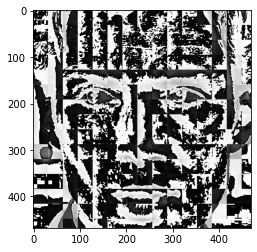

In [27]:
im_har = w2d(img1,'db1',5)
plt.imshow(im_har, cmap='gray')

## CREATING A DICTIONARY TO RETURN A NUMBER FOR A CELEBRITY'S NAME

In [28]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Cilian Murphy': 0,
 'IdrisElba': 1,
 'Leonardo Dicaprio': 2,
 'Natalie Portman': 3,
 'Nawazuddin Siddiqui': 4,
 'Tessa Thompson': 5,
 'Tom Hardy': 6}

In [29]:
## CREATING INPUT AND OUTPUTS FOR TRAINING

In [30]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [31]:
y


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [32]:
len(x[0])

4096

In [33]:
x=np.array(x).reshape(len(x),len(x[0])).astype(float)

In [34]:
x.shape

(257, 4096)

## TRAINING A Support Vector Machine Algorithm.

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [50]:

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [51]:
pipeline = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

In [53]:
pipeline.fit(x_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [39]:
print(classification_report(y_test,pipeline.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      0.75      0.86         4
           2       0.89      0.80      0.84        10
           3       0.56      0.83      0.67         6
           4       1.00      1.00      1.00        24
           5       0.80      0.57      0.67         7
           6       0.78      1.00      0.88         7

    accuracy                           0.88        65
   macro avg       0.86      0.83      0.83        65
weighted avg       0.90      0.88      0.88        65



In [40]:
## TRYING TO FIND BEST MODEL WITH BEST PARAMETERS FOR THE GIVEN DATASET

In [41]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
model_parameters = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'parameters' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'parameters' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'parameters': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [70]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_parameters.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['parameters'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_parameters': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_parameters'])
df

,model,best_score,best_parameters
0,svm,0.806883,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.619568,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.812686,{'logisticregression__C': 1}


In [57]:
best_estimators['svm'].score(x_train,y_train)


1.0

In [58]:
best_estimators['random_forest'].score(x_train,y_train)

0.9947916666666666

In [60]:
best_estimators['logistic_regression'].score(x_train,y_train)

1.0

In [64]:
##MOVING FORWARD WITH SVM
best_model = best_estimators['svm']

Text(69.0, 0.5, 'Truth')

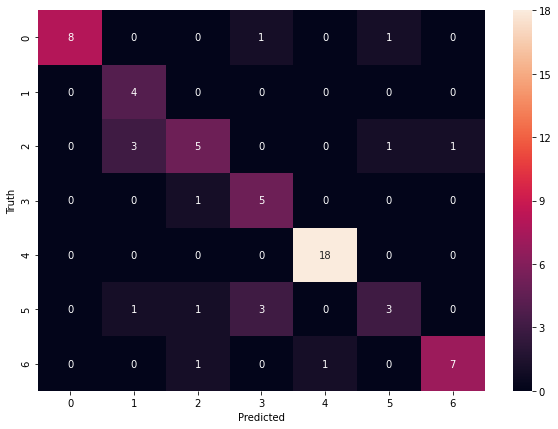

In [66]:
#CONFUSION_MATRIX
from sklearn.metrics import confusion_matrix
c_matrix= confusion_matrix(y_test, best_model.predict(x_test))
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(c_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## SAVING THE MODEL AS WELL AS THE CLASS DICTIONARY

In [68]:
!pip install joblib
import joblib 
joblib.dump(best_model, 'saved_model.pkl') 
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))